# **Mini-Project Title: Intelligent Traffic Monitoring and Analysis System**

## **Overview**
This project focuses on building an intelligent system for monitoring and analyzing traffic using **computer vision** and **machine learning** techniques. With the increasing number of vehicles on the road, manual traffic monitoring is inefficient and error-prone. Automating this process using AI ensures scalability, accuracy, and real-time analysis.

---

## **Objective**
Develop a computer vision-powered system that monitors traffic, detects vehicles, estimates traffic density, and analyzes traffic patterns. The system will use techniques like **object detection**, **tracking**, and **video analysis** to provide actionable insights for traffic management.

---

## **Learning Outcomes**
1. Understand computer vision techniques like **object detection**, **tracking**, and **video analysis**.
2. Explore deep learning models such as **YOLO** and **OpenCV** for traffic monitoring.
3. Learn to preprocess and analyze video data for traffic density estimation.
4. Gain experience in deploying computer vision models for real-time applications.
5. Develop skills in visualizing and interpreting traffic data.

---

## **Step 1: Define the Problem**
### **Task:**
Understand the problem and its real-world implications. Automating traffic monitoring using computer vision can improve traffic management, reduce congestion, and enhance road safety.

### **Mini-task:**
Write a brief paragraph on how computer vision benefits traffic management systems.

**Example:**
Computer vision enables real-time monitoring of traffic by automatically detecting vehicles, estimating traffic density, and identifying anomalies like accidents or traffic jams. This automation reduces the need for manual intervention, improves response times, and provides data-driven insights for better traffic management.

---

Computer vision significantly enhances traffic management systems by enabling real-time monitoring and analysis of road conditions through automated visual data processing. By detecting vehicles, estimating traffic density, and tracking movement patterns, it helps identify congestion hotspots, optimize traffic signal timings, and improve overall flow. Additionally, it supports incident detection—such as accidents or illegal parking—faster than manual monitoring, leading to quicker response times and increased road safety. These insights enable more efficient urban planning and smarter transportation infrastructure.


## **Step 2: Data Collection**
### **Task:**
Collect video data of traffic scenes suitable for analysis. Publicly available datasets such as the **UA-DETRAC dataset** or traffic surveillance videos from Kaggle can be used.
### **Mini-task:**
Download and load a suitable dataset for traffic monitoring.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Change this to match your Drive path
video_folder = '/content/drive/My Drive/AI ML 3MTT/traffic_data/video'

# List all video files
video_files = [os.path.join(video_folder, f) for f in os.listdir(video_folder) if f.endswith(('.avi', '.mp4', '.mov'))]

print(f"Found {len(video_files)} video files.")
for f in video_files:
    print(f)

Found 309 video files.
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080517x01653 (1).avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080606x01820.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080519x01692.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080519x01693.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080607x01835.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080517x01653.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080606x01821.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080516x01644.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080517x01660.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080519x01689.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080517x01662.avi
/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv05

In [3]:
import cv2

for video_path in video_files:
    print(f"\nReading: {video_path}")
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Example: resize or preprocess frame here
        # frame = cv2.resize(frame, (640, 360))

        frame_count += 1

    cap.release()
    print(f"Finished: {frame_count} frames processed.")



Reading: /content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080517x01653 (1).avi
Finished: 53 frames processed.

Reading: /content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080606x01820.avi
Finished: 53 frames processed.

Reading: /content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080519x01692.avi
Finished: 51 frames processed.

Reading: /content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080519x01693.avi
Finished: 53 frames processed.

Reading: /content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080607x01835.avi
Finished: 53 frames processed.

Reading: /content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080517x01653.avi
Finished: 53 frames processed.

Reading: /content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080606x01821.avi
Finished: 47 frames processed.

Reading: /content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080516x01644.avi
Finished: 53 frames processed.

Rea

## **Step 3: Exploratory Data Analysis (EDA)**
### **Task:**
Analyze the video data to understand traffic patterns, vehicle types, and density. Extract key frames and visualize traffic scenes.

### **Mini-task:**
Visualize the distribution of vehicle types and traffic density in the dataset.

```python
import matplotlib.pyplot as plt

# Example: Plot traffic density over time
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
density_over_time = []

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    # Perform vehicle detection and count (using YOLO or other models)
    # density_over_time.append(vehicle_count)

plt.plot(density_over_time)
plt.title("Traffic Density Over Time")
plt.xlabel("Frame Number")
plt.ylabel("Vehicle Count")
plt.show()
```

---

## Load a Pretrained Vehicle Detection Model

In [4]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17516 (delta 6), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17516/17516), 16.66 MiB | 29.26 MiB/s, done.
Resolving deltas: 100% (11997/11997), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta

## Process Frames and Count Vehicle Types

In [5]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-7-16 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 182MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Supported vehicle types in COCO
vehicle_classes = ['car', 'truck', 'bus', 'motorbike']

# Dictionary to hold counts
vehicle_distribution = defaultdict(int)
density_over_time = []

# Process video
cap = cv2.VideoCapture(video_files[0])  # Use first video or loop over all
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for i in range(min(frame_count, 200)):  # Process first 200 frames for speed
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO expects RGB image
    results = model(frame[..., ::-1])

    detections = results.pandas().xyxy[0]
    vehicle_count = 0

    for _, row in detections.iterrows():
        label = row['name']
        if label in vehicle_classes:
            vehicle_distribution[label] += 1
            vehicle_count += 1

    density_over_time.append(vehicle_count)

cap.release()

## Visualize Results

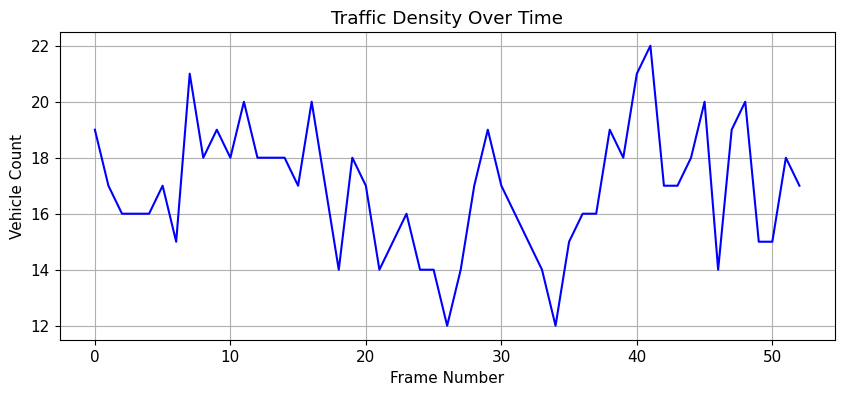

In [7]:
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.plot(density_over_time, color='blue')
plt.title("Traffic Density Over Time")
plt.xlabel("Frame Number")
plt.ylabel("Vehicle Count")
plt.grid(True)
plt.show()

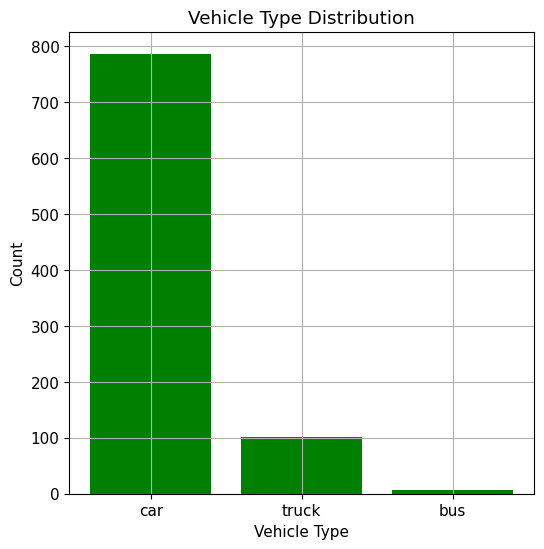

In [8]:
plt.figure(figsize=(6, 6))
plt.bar(vehicle_distribution.keys(), vehicle_distribution.values(), color='green')
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## **Step 4: Video Preprocessing**
### **Task:**
Preprocess the video data for analysis. Techniques include:
- Frame extraction
- Resizing and normalization
- Noise reduction

### **Mini-task:**
Extract and preprocess a few frames from the video.

```python
# Example: Extract and preprocess frames
def preprocess_frame(frame):
    frame = cv2.resize(frame, (640, 480))  # Resize frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    return frame

frames = []
for i in range(10):  # Extract first 10 frames
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(preprocess_frame(frame))

# Display a sample frame
plt.imshow(frames[0], cmap='gray')
plt.axis('off')
plt.show()
```

---


## Extract and preprocess frames

In [9]:
import cv2
import matplotlib.pyplot as plt

# Reopen the video file (ensure this points to a valid video)
cap = cv2.VideoCapture(video_files[0])  # First video in your dataset

def preprocess_frame(frame):
    # Resize to a fixed size
    frame = cv2.resize(frame, (640, 480))
    # Convert to grayscale
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Optional: normalize pixel values to range [0, 1]
    frame = frame / 255.0
    return frame

frames = []
for i in range(10):  # Extract first 10 frames
    ret, frame = cap.read()
    if not ret:
        break
    preprocessed = preprocess_frame(frame)
    frames.append(preprocessed)

cap.release()

## Visualize the first preprocessed frame

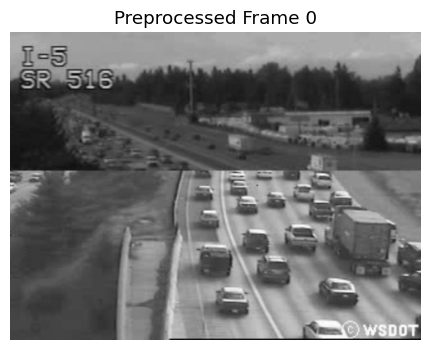

In [10]:
plt.figure(figsize=(6, 4))
plt.imshow(frames[0], cmap='gray')
plt.title("Preprocessed Frame 0")
plt.axis('off')
plt.show()

## **Step 5: Feature Engineering**
### **Task:**
Extract features from the video data for analysis. Techniques include:
- Vehicle detection using **YOLO**
- Traffic density estimation
- Vehicle tracking

### **Mini-task:**
Perform vehicle detection using a pre-trained YOLO model.

```python
from ultralytics import YOLO

# Load a pre-trained YOLO model
model = YOLO('yolov8n.pt')

# Perform vehicle detection on a frame
results = model(frames[0])

# Visualize the results
results[0].show()
```

---

In [11]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 nano model
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 73.7MB/s]



0: 480x640 11 cars, 2 trucks, 62.1ms
Speed: 4.1ms preprocess, 62.1ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


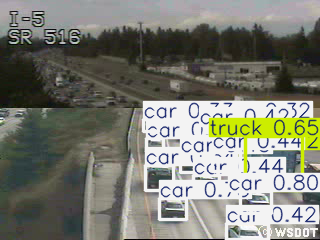

In [12]:
import cv2

# Reopen video to get raw frame (not preprocessed)
cap = cv2.VideoCapture(video_files[0])
ret, frame = cap.read()
cap.release()

if ret:
    # Run detection on the original frame
    results = model(frame)
    results[0].show()  # Opens interactive image viewer in Colab (new tab)
else:
    print("Failed to read frame.")

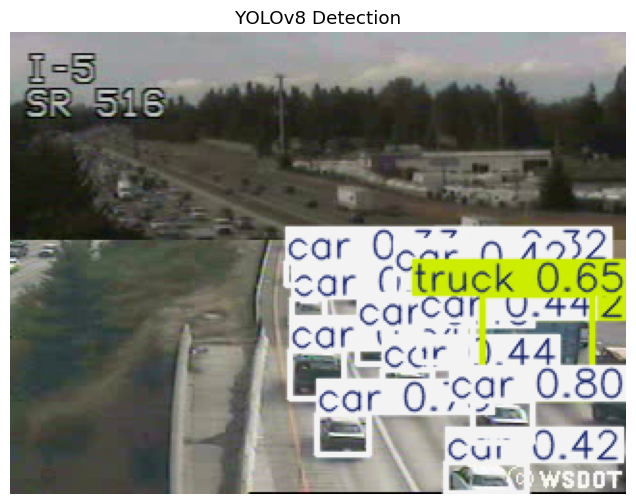

In [13]:
results[0].plot()  # Get the image with detections
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(results[0].plot()[..., ::-1])  # Convert BGR to RGB
plt.title("YOLOv8 Detection")
plt.axis('off')
plt.show()

## **Step 6: Model Training and Analysis**
### **Task:**
Train a model to analyze traffic patterns, such as predicting traffic density or detecting anomalies. Use classical machine learning models or deep learning models.

### **Mini-task:**
Train a simple model to classify traffic density (low, medium, high) based on vehicle counts.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Example: Train a traffic density classifier
X = np.array(density_over_time).reshape(-1, 1)  # Feature: vehicle count
y = np.where(X < 10, 0, np.where(X < 20, 1, 2))  # Labels: 0=low, 1=medium, 2=high

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```

---

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Ensure density_over_time exists and is populated
# Example: density_over_time = [4, 6, 12, 18, 25, 30, 8, ...]

X = np.array(density_over_time).reshape(-1, 1)  # Feature: vehicle count per frame

# Label density: 0 = low (<10), 1 = medium (10-19), 2 = high (20+)
y = np.where(X < 10, 0, np.where(X < 20, 1, 2)).flatten()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


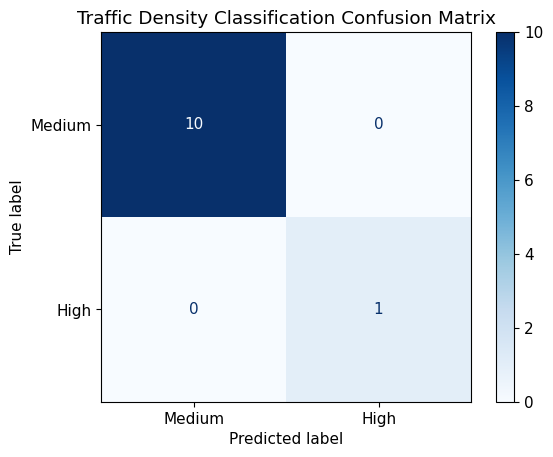

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict and generate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Use only the labels present in the test set
labels_present = np.unique(np.concatenate((y_test, y_pred)))

# Optional: map label numbers to names
label_names = ['Low', 'Medium', 'High']
label_map = {0: 'Low', 1: 'Medium', 2: 'High'}
display_labels = [label_map[i] for i in labels_present]

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues')
plt.title("Traffic Density Classification Confusion Matrix")
plt.show()

## **Step 7: Deployment and Visualization**
### **Task:**
Deploy the traffic monitoring system and visualize the results in real-time. Use tools like **OpenCV** for real-time visualization.

### **Mini-task:**
Create a real-time traffic monitoring dashboard using OpenCV.

```python
# Example: Real-time traffic monitoring
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform vehicle detection
    results = model(frame)
    annotated_frame = results[0].plot()

    # Display the annotated frame
    cv2.imshow('Traffic Monitoring', annotated_frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
```

---

In [17]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
cv2_imshow(annotated_frame)

# Load YOLO model
model = YOLO('yolov8n.pt')

# Load video
video_path = '/content/drive/My Drive/AI ML 3MTT/traffic_data/video/cctv052x2004080516x01640.avi'
cap = cv2.VideoCapture(video_path)

# Set up video writer
output_path = '/content/drive/My Drive/AI ML/traffic_data/output_annotated.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = cap.get(cv2.CAP_PROP_FPS) or 20
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = results[0].plot()

    # Count vehicles
    vehicle_count = 0
    for box in results[0].boxes:
        cls_id = int(box.cls[0].item())
        cls_name = model.names[cls_id]
        if cls_name in ['car', 'bus', 'truck', 'motorbike']:
            vehicle_count += 1

    # Annotate frame
    cv2.putText(annotated_frame, f"Vehicles: {vehicle_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show and write output
    cv2_imshow(annotated_frame)
    out.write(annotated_frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

## **Optional: Advanced Techniques**
### **Task:**
Explore advanced techniques like:
- **Anomaly detection** (e.g., accidents or traffic jams)
- **Traffic flow prediction** using time series analysis
- **Integration with IoT devices** for real-time data collection

---


## **Conclusion**
This project provides a comprehensive approach to building an intelligent traffic monitoring and analysis system using **computer vision** and **machine learning**. By automating traffic monitoring, we can improve road safety, reduce congestion, and enhance traffic management.

---